In [2]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

# authenticate
credential = DefaultAzureCredential()

SUBSCRIPTION = "subscription_number"
RESOURCE_GROUP = "resource1"
WS_NAME = "workplace1"

# Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id=SUBSCRIPTION,
    resource_group_name=RESOURCE_GROUP,
    workspace_name=WS_NAME,
)

In [3]:
# Verify that the handle works correctly.
# If you ge an error here, modify your SUBSCRIPTION, RESOURCE_GROUP, and WS_NAME in the previous cell.
ws = ml_client.workspaces.get(WS_NAME)
print(ws.location, ":", ws.resource_group)

eastus2 : resource1


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_path_pyramid = './ML_Project/Test/apple_pie/134.jpg'

# read as numpy image
img = mpimg.imread(img_path_pyramid)

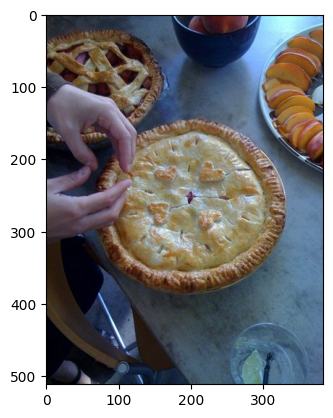

In [5]:
plt.imshow(img)

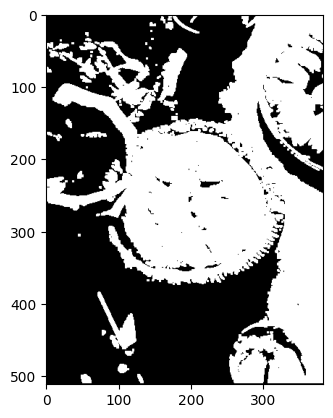

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def percolation_filter(img, threshold=128):
    # Threshold the image (you may adjust the threshold value)
    binary_image = (img > threshold).astype(int)

    # Define the percolation filter (connected components)
    percolation_filter = np.array([[1, 1, 1],
                                   [1, 1, 1],
                                   [1, 1, 1]])

    # Create a placeholder for the filtered image
    filtered_image = np.zeros_like(img)

    # Apply the percolation filter
    for row in range(1, img.shape[0] - 1):
        for col in range(1, img.shape[1] - 1):
            if np.any(binary_image[row - 1:row + 2, col - 1:col + 2] * percolation_filter):
                filtered_image[row, col] = 255  # Set to white in the filtered image

    # Display the filtered image
    plt.imshow(filtered_image, cmap='gray')
    plt.show()

# Assuming 'img' is a grayscale image
# Call the function
percolation_filter(img)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


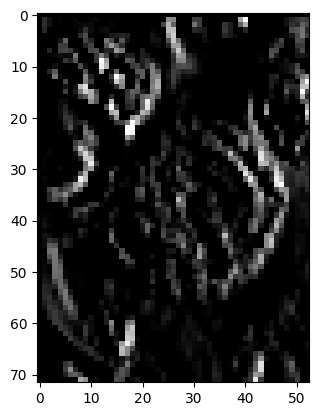

In [7]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_path_pyramid = './ML_Project/Test/apple_pie/134.jpg'

# read as numpy image
img = mpimg.imread(img_path_pyramid)

#decrease the dimension of the image to suite the filter we're using
img = img[::7,::7,:]

# Define the 3x3 filter (Gradient for x-direction from Sobel filter)
filter = [[1, 0, -1],
          [1, 0, -1],
          [1, 0, -1]]

# Create placeholder for filtered image
filtered_image = np.full((img.shape[0] - 2, img.shape[1] - 2, 3), 0).astype(int)

for row in range(img.shape[0]): # stride is 1
  for col in range(img.shape[1]): # stride is 1
    if row > 2 and col > 2:
      # Apply filter on first channel of image
      filtered_image[row - 2:row, col - 2:col, :] =  np.sum(img[row -3 :row, col - 3:col, 0] * filter).astype(int)

plt.imshow(filtered_image, vmin=filtered_image.min(), vmax=filtered_image.max())
plt.show()

## Exploring the Dataset

In [8]:
# Paths and placeholders for files
train_root = './ML_Project/Train'
test_root = './ML_Project/Test'
train_path_dict = {}
test_path_dict = {}

In [9]:
import os

# Go through all train folders
for subdir, dirs, files in os.walk(train_root):
    wonder = subdir.split("/")[-1]
    paths = []
    for file in files:
        paths.append(os.path.join(subdir, file))
    if wonder != "train":
        train_path_dict[wonder] = paths

# Go through all test folders
for subdir, dirs, files in os.walk(test_root):
    wonder = subdir.split("/")[-1]
    paths = []
    for file in files:
        paths.append(os.path.join(subdir, file))
    if wonder != "test":
        test_path_dict[wonder] = paths

# Show example
test_path_dict

{'Test': ['./ML_Project/Test/.amlignore',
  './ML_Project/Test/.amlignore.amltmp',
  './ML_Project/Test/.DS_Store'],
 'apple_pie': ['./ML_Project/Test/apple_pie/.amlignore',
  './ML_Project/Test/apple_pie/.amlignore.amltmp',
  './ML_Project/Test/apple_pie/134.jpg',
  './ML_Project/Test/apple_pie/21063.jpg',
  './ML_Project/Test/apple_pie/23893.jpg',
  './ML_Project/Test/apple_pie/38795.jpg',
  './ML_Project/Test/apple_pie/63651.jpg',
  './ML_Project/Test/apple_pie/64846.jpg',
  './ML_Project/Test/apple_pie/67826.jpg',
  './ML_Project/Test/apple_pie/68383.jpg',
  './ML_Project/Test/apple_pie/78081.jpg',
  './ML_Project/Test/apple_pie/80734.jpg'],
 'baby_back_ribs': ['./ML_Project/Test/baby_back_ribs/16366.jpg',
  './ML_Project/Test/baby_back_ribs/18596.jpg',
  './ML_Project/Test/baby_back_ribs/19325.jpg',
  './ML_Project/Test/baby_back_ribs/2432.jpg',
  './ML_Project/Test/baby_back_ribs/24726.jpg',
  './ML_Project/Test/baby_back_ribs/26834.jpg',
  './ML_Project/Test/baby_back_ribs/35719

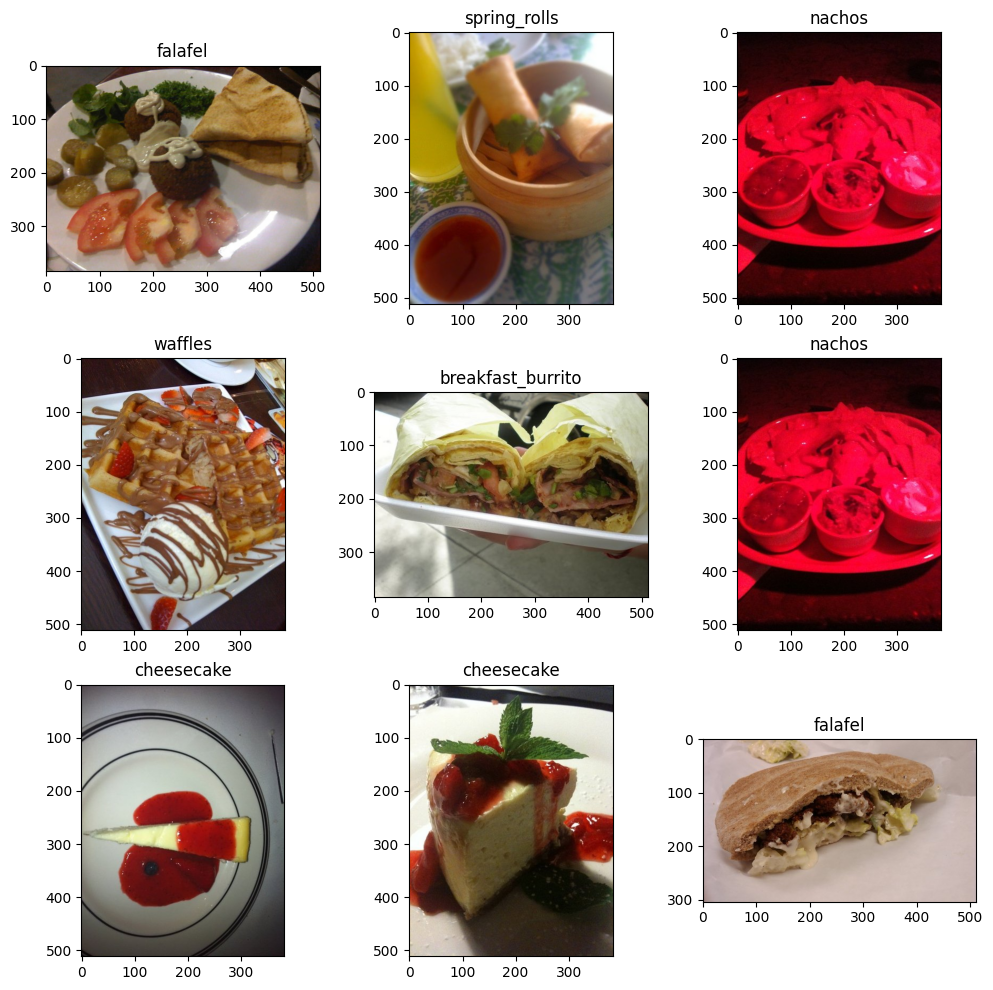

In [11]:
import matplotlib.pyplot as plt
import random

num_images_per_axis = 3
figsize = (12,12)
figure = plt.figure(figsize=figsize)

for i in range(num_images_per_axis**2):
  ax = figure.add_subplot(num_images_per_axis, num_images_per_axis, i+1)
  # Randomly select wonder
  wonder_type = random.choice(list(train_path_dict.keys()))
  ax.title.set_text(wonder_type)
  # Select random file index
  index = random.choice(range(0,5))
  img = plt.imread(train_path_dict[wonder_type][index])
  ax.imshow(img)

In [ ]:
!pip install torch
!pip install torchvision

In [12]:
curated_env_name = "AzureML-pytorch-1.9-ubuntu18.04-py37-cuda11-gpu@latest"

In [13]:
from azure.ai.ml.entities import AmlCompute

gpu_compute_target = "gpu-cluster"

try:
    # let's see if the compute target already exists
    gpu_cluster = ml_client.compute.get(gpu_compute_target)
    print(
        f"You already have a cluster named {gpu_compute_target}, we'll reuse it as is."
    )

except Exception:
    print("Creating a new gpu compute target...")

    # Let's create the Azure ML compute object with the intended parameters
    gpu_cluster = AmlCompute(
        # Name assigned to the compute cluster
        name="gpu-cluster",
        # Azure ML Compute is the on-demand VM service
        type="amlcompute",
        # VM Family
        size="Standard_E2s_v3",
        # Minimum running nodes when there is no job running
        min_instances=0,
        # Nodes in cluster
        max_instances=4,
        # How many seconds will the node running after the job termination
        idle_time_before_scale_down=180,
        # Dedicated or LowPriority. The latter is cheaper but there is a chance of job termination
        tier="Dedicated",
    )

    # Now, we pass the object to MLClient's create_or_update method
    gpu_cluster = ml_client.begin_create_or_update(gpu_cluster).result()

print(
    f"AMLCompute with name {gpu_cluster.name} is created, the compute size is {gpu_cluster.size}"
)

You already have a cluster named gpu-cluster, we'll reuse it as is.
AMLCompute with name gpu-cluster is created, the compute size is STANDARD_NC6S_V3


In [14]:
import os

train_src_dir = "./src"
os.makedirs(train_src_dir, exist_ok=True)

In [15]:
!pip install pytorch-lightning


  Using cached pytorch_lightning-2.2.0.post0-py3-none-any.whl (800 kB)
  Using cached torch-2.2.0-cp38-cp38-manylinux1_x86_64.whl (755.5 MB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached triton-2.2.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (167.9 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_n

In [16]:
!pip install scikit-learn

In [30]:
%%writefile {train_src_dir}/main.py
import os
import argparse
import pandas as pd
import mlflow
import mlflow.pytorch
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from mlflow.entities import Metric

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(32 * 128 * 128, 128),
            nn.ReLU(),
            nn.Linear(128, 16)  # Output size 16 for 16 classes
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

def compute_roc_curve(model, test_loader):
    all_labels = []
    all_probs = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            probabilities = nn.Softmax(dim=1)(outputs)
            all_labels.extend(labels.numpy())
            all_probs.extend(probabilities.numpy())
    
    fprs, tprs = [], []
    for i in range(16):
        fpr, tpr = compute_class_roc_curve(all_labels, all_probs, i)
        fprs.append(fpr)
        tprs.append(tpr)
    
    return fprs, tprs

def compute_class_roc_curve(labels, probs, class_index):
    true_positives = 0
    false_positives = 0
    total_positives = 0
    total_negatives = 0
    
    for label, prob in zip(labels, probs):
        if label == class_index:
            total_positives += 1
            if prob[class_index] > 0.5:
                true_positives += 1
        else:
            total_negatives += 1
            if prob[class_index] > 0.5:
                false_positives += 1
                
    fpr = false_positives / total_negatives
    tpr = true_positives / total_positives
    
    return fpr, tpr

def plot_roc_curve(fprs, tprs):
    plt.figure()
    for fpr, tpr in zip(fprs, tprs):
        plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.savefig('roc_curve.png')

def main():
    """Main function of the script."""
    # input and output arguments
    parser = argparse.ArgumentParser()
    parser.add_argument("--data", type=str, help="path to input data")
    parser.add_argument("--test_root", type=str, help="path to test data")
    parser.add_argument("--test_train_ratio", type=float, required=False, default=0.25)
    parser.add_argument("--registered_model_name", type=str, help="model name")
    args = parser.parse_args()
   
    # Start Logging
    mlflow.start_run()

    ###################
    #<prepare the data>
    ###################
    print(" ".join(f"{k}={v}" for k, v in vars(args).items()))

    print("input data:", args.data)
    
    # Assuming you have a train dataset in args.data directory
    train_dataset = torchvision.datasets.ImageFolder(
        root=args.data,
        transform=transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Resize((512, 512))
        ])
    )

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    
    test_dataset = torchvision.datasets.ImageFolder(
        root=args.test_root,
        transform=transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Resize((512, 512))
        ])
    )

    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    ####################
    #</prepare the data>
    ####################

    ##################
    #<train the model>
    ##################
    model = CNNModel()

    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    loss = None
    for epoch in range(5):  # You can adjust the number of epochs as needed
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    ###################
    #</train the model>
    ###################

    ##########################
    #<save and register model>
    ##########################
    # Save the trained model
    torch.save(model.state_dict(), "trained_model.pth")

    # Registering the model to the workspace
    print("Registering the model via MLFlow")
    mlflow.pytorch.log_model(model, args.registered_model_name)

    # Saving the model to a file
    mlflow.pytorch.save_model(model, args.registered_model_name)
    ###########################
    #</save and register model>
    ###########################
    
    # Compute ROC curve
    fprs, tprs = compute_roc_curve(model, test_loader)
    
    # Plot ROC curve
    plot_roc_curve(fprs, tprs)
    
    # Log ROC curve as a metric
    for class_idx in range(len(fprs)):
        mlflow.log_metric(f"fpr_{class_idx}", fprs[class_idx])
        mlflow.log_metric(f"tpr_{class_idx}", tprs[class_idx])
    
    # Log training loss
    mlflow.log_metric("training_loss", loss.item())
    
    # Stop Logging
    mlflow.end_run()

if __name__ == "__main__":
    main()


Overwriting ./src/main.py


In [31]:
import os
from azure.ai.ml import command
from azure.ai.ml import Input

registered_model_name = "food-classification-model"

job = command(
    inputs=dict(
        data=Input(
            path="./ML_Project/Train/",
        ),
        test_root=Input(
            path="./ML_Project/Test/",
        ),
        

        test_train_ratio=0.2,
        registered_model_name=registered_model_name,
    ),
    code="./src/",  # location of source code
    command="python main.py --data ${{inputs.data}} --test_root ${{inputs.test_root}} --test_train_ratio ${{inputs.test_train_ratio}} --registered_model_name ${{inputs.registered_model_name}}",
    environment=curated_env_name,
    display_name="food_classification_model",
)



In [32]:
ml_client.jobs.create_or_update(job)

Uploading src (0.01 MBs): 100%|██████████| 5613/5613 [00:00<00:00, 425972.14it/s]




Experiment,Name,Type,Status,Details Page
Foods-Project,quirky_night_36q3t31071,command,Starting,Link to Azure Machine Learning studio


In [49]:
import uuid

# Creating a unique name for the endpoint
online_endpoint_name = "food-endpoint-" + str(uuid.uuid4())[:8]

In [50]:
# Expect the endpoint creation to take a few minutes
from azure.ai.ml.entities import (
    ManagedOnlineEndpoint,
    ManagedOnlineDeployment,
    Model,
    Environment,
)

# create an online endpoint
endpoint = ManagedOnlineEndpoint(
    name=online_endpoint_name,
    description="this is an online endpoint",
    auth_mode="key",
    tags={
        "training_dataset": "credit_defaults",
        "model_type": "torch.nn.Sequential",
    },
)

endpoint = ml_client.online_endpoints.begin_create_or_update(endpoint).result()

print(f"Endpoint {endpoint.name} provisioning state: {endpoint.provisioning_state}")

Endpoint food-endpoint-7880d4a9 provisioning state: Succeeded


In [51]:
endpoint = ml_client.online_endpoints.get(name=online_endpoint_name)

print(
    f'Endpoint "{endpoint.name}" with provisioning state "{endpoint.provisioning_state}" is retrieved'
)

Endpoint "food-endpoint-7880d4a9" with provisioning state "Succeeded" is retrieved


In [52]:
# List all models
all_models = ml_client.models.list()

# Iterate over the models and print their details
for model in all_models:
    print(f"Name: {model.name}, Version: {model.version}, Description: {model.description}")
    model.version = "2"
    print(f"Name: {model.name}, Version: {model.version}, Description: {model.description}")


Name: azureml_mango_shirt_vhw92tbjc8_output_mlflow_log_model_1974916105, Version: None, Description: None
Name: azureml_mango_shirt_vhw92tbjc8_output_mlflow_log_model_1974916105, Version: 2, Description: None
Name: azureml_mango_shirt_vhw92tbjc8_output_mlflow_log_model_1099368587, Version: None, Description: None
Name: azureml_mango_shirt_vhw92tbjc8_output_mlflow_log_model_1099368587, Version: 2, Description: None
Name: credit_defaults_model, Version: None, Description: None
Name: credit_defaults_model, Version: 2, Description: None
Name: azureml_wheat_garden_dmr7j4sjgl_output_mlflow_log_model_1982509246, Version: None, Description: None
Name: azureml_wheat_garden_dmr7j4sjgl_output_mlflow_log_model_1982509246, Version: 2, Description: None
Name: azureml_teal_market_mpkbjj7gmb_output_mlflow_log_model_1893551161, Version: None, Description: None
Name: azureml_teal_market_mpkbjj7gmb_output_mlflow_log_model_1893551161, Version: 2, Description: None
Name: azureml_elated_parsnip_vv3s61rxjb_o

In [57]:
# picking the model to deploy. Here we use the latest version of our registered model
model = ml_client.models.get(name="Food_Model", version = "1")

# Expect this deployment to take approximately 6 to 8 minutes.
# create an online deployment.
# if you run into an out of quota error, change the instance_type to a comparable VM that is available.
# Learn more on https://azure.microsoft.com/en-us/pricing/details/machine-learning/.
blue_deployment = ManagedOnlineDeployment(
    name="bluenew",
    endpoint_name=online_endpoint_name,
    model=model,
    instance_type="Standard_E2s_v3",
    instance_count=1,
)

blue_deployment = ml_client.begin_create_or_update(blue_deployment).result()

Check: endpoint food-endpoint-7880d4a9 exists


................................................................................................................................................................................................................................................

HttpResponseError: (None) ResourceNotReady: User container has crashed or terminated: Liveness probe failed: HTTP probe failed with statuscode: 502. Please see troubleshooting guide, available here: https://aka.ms/oe-tsg#error-resourcenotready
Code: None
Message: ResourceNotReady: User container has crashed or terminated: Liveness probe failed: HTTP probe failed with statuscode: 502. Please see troubleshooting guide, available here: https://aka.ms/oe-tsg#error-resourcenotready
Exception Details:	(None) ResourceNotReady: User container has crashed or terminated: Liveness probe failed: HTTP probe failed with statuscode: 502. Please see troubleshooting guide, available here: https://aka.ms/oe-tsg#error-resourcenotready
	Code: None
	Message: ResourceNotReady: User container has crashed or terminated: Liveness probe failed: HTTP probe failed with statuscode: 502. Please see troubleshooting guide, available here: https://aka.ms/oe-tsg#error-resourcenotready

In [60]:
# deploy the model to AKS
import datetime
from azure.ai.ml.entities import KubernetesOnlineEndpoint

online_endpoint_name= "k8s-endpoint"+ datetime.datetime.now().strftime("%m%d%H%M%f")

# create an online endpoint
endpoint= KubernetesOnlineEndpoint(
    name=online_endpoint_name,
    #compute="moby",
    description="this is a sample k8s endpoint",
    auth_mode="key",
    tags={"key": "test_deplyoment"},
)

# then create the endpoint
ml_client.begin_create_or_update(endpoint).result()

ManagedOnlineEndpoint({'public_network_access': 'Enabled', 'provisioning_state': 'Succeeded', 'scoring_uri': 'https://k8s-endpoint02130429164745.eastus2.inference.ml.azure.com/score', 'openapi_uri': 'https://k8s-endpoint02130429164745.eastus2.inference.ml.azure.com/swagger.json', 'name': 'k8s-endpoint02130429164745', 'description': 'this is a sample k8s endpoint', 'tags': {'key': 'test_deplyoment'}, 'properties': {'azureml.onlineendpointid': '/subscriptions/1442df46-ca82-4ac8-88ee-d46af11321d5/resourcegroups/resource1/providers/microsoft.machinelearningservices/workspaces/workplace1/onlineendpoints/k8s-endpoint02130429164745', 'AzureAsyncOperationUri': 'https://management.azure.com/subscriptions/1442df46-ca82-4ac8-88ee-d46af11321d5/providers/Microsoft.MachineLearningServices/locations/eastus2/mfeOperationsStatus/oe:7cb64251-7726-43fa-af0b-424d994f28d2:6cba5375-55c8-4509-a3f1-658eeb4521ce?api-version=2022-02-01-preview'}, 'print_as_yaml': True, 'id': '/subscriptions/1442df46-ca82-4ac8-8

In [62]:
from azure.ai.ml.entities import KubernetesOnlineDeployment, CodeConfiguration

from azure.ai.ml.entities._deployment.resource_requirements_settings import ResourceRequirementsSettings

# configure the deployment
model = ml_client.models.get(name="Food_Model", version = "1")

blue_deployment = KubernetesOnlineDeployment(
    name="blue",
    endpoint_name=online_endpoint_name,
    model=model,
    #environment=env,
    
    instance_count=2,
    
)

In [63]:
ml_client.begin_create_or_update(blue_deployment).result()


Check: endpoint k8s-endpoint02130429164745 exists


HttpResponseError: (UserError) Cannot create a K8S deployment in endpoint k8s-endpoint02130429164745 because it is a Managed endpoint.
Code: UserError
Message: Cannot create a K8S deployment in endpoint k8s-endpoint02130429164745 because it is a Managed endpoint.
Additional Information:Type: ComponentName
Info: {
    "value": "managementfrontend"
}Type: Correlation
Info: {
    "value": {
        "operation": "c0494804d943767f82c9492a4113d9fc",
        "request": "6b675765cd82cb5d"
    }
}Type: Environment
Info: {
    "value": "eastus2"
}Type: Location
Info: {
    "value": "eastus2"
}Type: Time
Info: {
    "value": "2024-02-13T04:32:42.5549306+00:00"
}Type: InnerError
Info: {
    "value": {
        "code": "BadArgument",
        "innerError": {
            "code": "InvalidComputeTypeCombination",
            "innerError": null
        }
    }
}Type: MessageFormat
Info: {
    "value": "Cannot create a {deploymentComputeType} deployment in endpoint {endpointName} because it is a {endpointComputeType} endpoint."
}Type: MessageParameters
Info: {
    "value": {
        "deploymentComputeType": "K8S",
        "endpointName": "k8s-endpoint02130429164745",
        "endpointComputeType": "Managed"
    }
}

In [58]:
# test the blue deployment with some sample data
ml_client.online_endpoints.invoke(
    endpoint_name=online_endpoint_name,
    request_file="./ML_Project/Test",
    deployment_name="blue",
)

IsADirectoryError: [Errno 21] Is a directory: './ML_Project/Test'